In [7]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import  Dense, Dropout, Input
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input

In [8]:
num_classes = [7, 3, 3, 4, 6, 3]

In [9]:
X_train = np.load('data/X_train.npy')
X_val = np.load('data/X_val.npy')
y_train = np.load('data/y_train.npy')
y_val = np.load('data/y_val.npy')

In [10]:
y_train_split = [y_train[:, i] for i in range(6)]
y_val_split   = [y_val[:, i] for i in range(6)]

In [11]:
input_layer = Input(shape=(300, 225, 3))
base_model = DenseNet121(include_top=False, weights='imagenet', input_tensor=input_layer)


In [12]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)

In [13]:
outputs = [Dense(num, activation='softmax', name=f'attr_{i+1}')(x) for i, num in enumerate(num_classes)]

In [14]:
model = Model(inputs=input_layer, outputs=outputs)
for layer in base_model.layers:
    layer.trainable = False

In [15]:
model.compile(
    optimizer='adam',
    loss=['sparse_categorical_crossentropy'] * 6,
    metrics=['accuracy'] * 6
)

In [16]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 300, 225,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 306, 231,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 150, 113,  │      9,408 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 150, 113,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 150, 113,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 152, 115,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 75, 57,    │          0 │ zero_padding2d_3… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 75, 57,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 75, 57,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 75, 57,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 75, 57,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 75, 57,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 75, 57,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 75, 57,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 75, 57,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 75, 57,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 75, 57,    │     12,288 │ conv2_block2_0_r

 Total params: 7,306,586 (27.87 MB)

 Trainable params: 269,082 (1.03 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
history = model.fit(
    X_train, y_train_split,
    validation_data=(X_val, y_val_split),
    epochs=10,
    batch_size=32
)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 426s 3s/step - attr_1_accuracy: 0.3674 - attr_1_loss: 3.2685 - attr_2_accuracy: 0.4574 - attr_2_loss: 2.1680 - attr_3_accuracy: 0.5832 - attr_3_loss: 1.6611 - attr_4_accuracy: 0.3864 - attr_4_loss: 2.4251 - attr_5_accuracy: 0.5410 - attr_5_loss: 2.6083 - attr_6_accuracy: 0.6828 - attr_6_loss: 1.4427 - loss: 13.6036 - val_attr_1_accuracy: 0.4570 - val_attr_1_loss: 1.5501 - val_attr_2_accuracy: 0.5310 - val_attr_2_loss: 1.0069 - val_attr_3_accuracy: 0.7270 - val_attr_3_loss: 0.8099 - val_attr_4_accuracy: 0.4120 - val_attr_4_loss: 1.0671 - val_attr_5_accuracy: 0.6800 - val_attr_5_loss: 1.1032 - val_attr_6_accuracy: 0.8010 - val_attr_6_loss: 0.6725 - val_loss: 6.1778
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 443s 3s/step - attr_1_accuracy: 0.4736 - attr_1_loss: 1.6079 - attr_2_accuracy: 0.5202 - attr_2_loss: 1.0354 - attr_3_accuracy: 0.7044 - attr_3_loss: 0.8475 - attr_4_accuracy: 0.4194 - attr_4_loss: 1.1198 - attr_5_accuracy: 0.6676 - attr_5_loss: 1.

In [ ]:
preds = model.predict(X_val)
y_pred = [np.argmax(p, axis=1) for p in preds]
y_true = [y_val[:, i] for i in range(6)]


32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 665ms/step


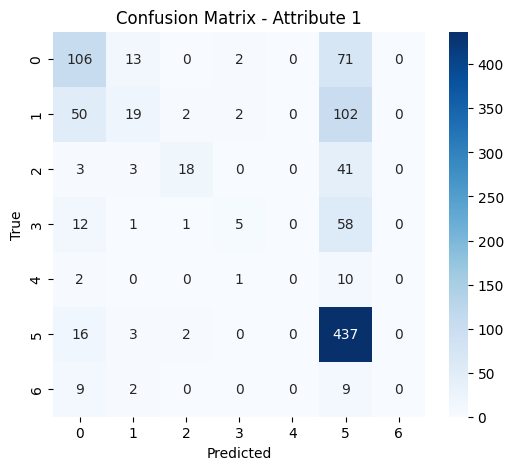

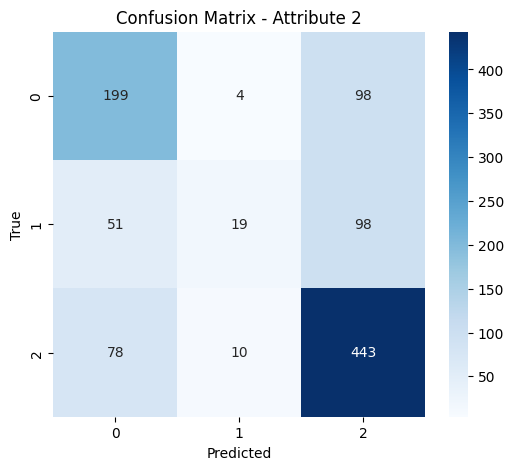

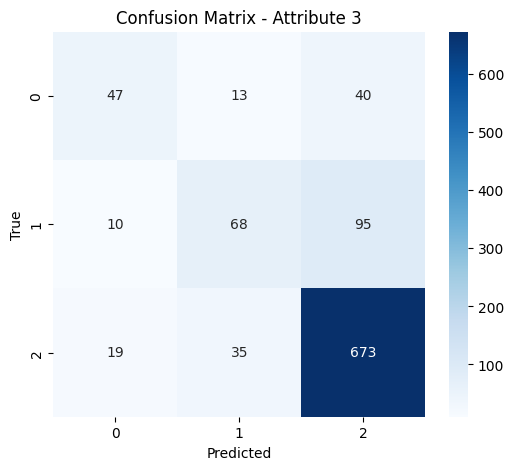

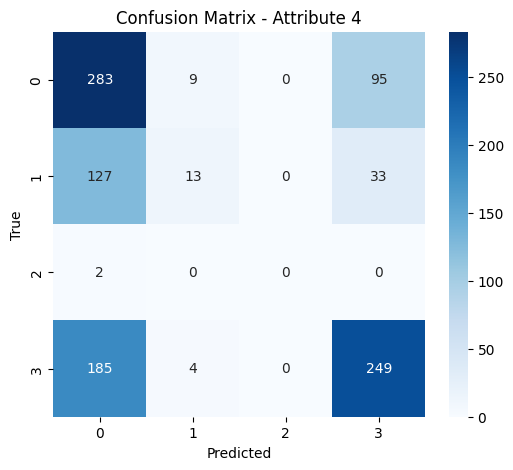

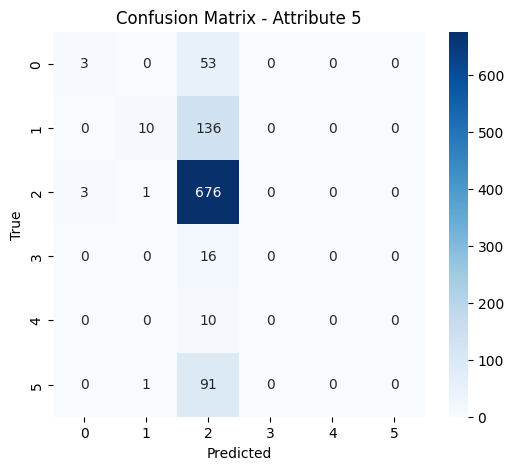

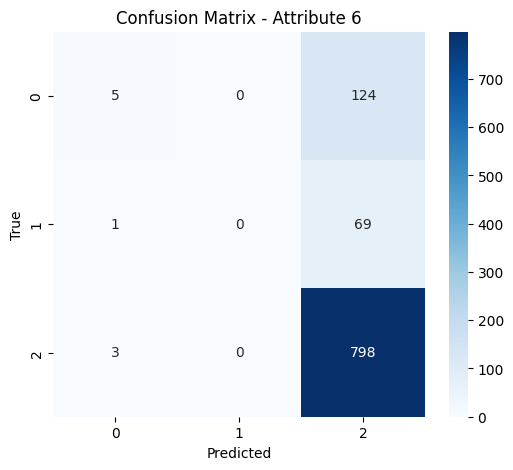

In [ ]:


for i in range(6):
    cm = confusion_matrix(y_true[i], y_pred[i])
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - Attribute {i+1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
